In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
temp = pd.read_csv("/content/drive/MyDrive/temperature_CO2/an_wld.csv", encoding="cp932")
temp.isna().sum()

年       0
世界全体    0
北半球     0
南半球     0
dtype: int64

In [196]:
temp.columns = ["year", "world_temp", "北半球", "南半球"]
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        132 non-null    int64  
 1   world_temp  132 non-null    float64
 2   北半球         132 non-null    float64
 3   南半球         132 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.2 KB


In [197]:
co2 = pd.read_csv("/content/drive/MyDrive/temperature_CO2/p052-2-2.csv")
co2.head()

,year,年平均二酸化炭素濃度(ppm)
0,1984,344.3
1,1985,345.7
2,1986,347.2
3,1987,349.0
4,1988,351.3


In [198]:
co2.columns = ["year", "CO2/ppm"]
co2.head()

,year,CO2/ppm
0,1984,344.3
1,1985,345.7
2,1986,347.2
3,1987,349.0
4,1988,351.3


In [199]:
df = pd.merge(temp, co2, on="year")
df.head()

,year,world_temp,北半球,南半球,CO2/ppm
0,1984,-0.51,-0.67,-0.31,344.3
1,1985,-0.51,-0.72,-0.28,345.7
2,1986,-0.42,-0.57,-0.25,347.2
3,1987,-0.27,-0.46,-0.06,349.0
4,1988,-0.28,-0.37,-0.17,351.3


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        32 non-null     int64  
 1   world_temp  32 non-null     float64
 2   北半球         32 non-null     float64
 3   南半球         32 non-null     float64
 4   CO2/ppm     32 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [201]:
def unixtime(x):
    if x < 1970:
        return print("Not calcurate")
    elif x >= 1970:
        return (x - 1970) * 31536000

In [202]:
df["Unixtime"] = df["year"].apply(unixtime)

In [203]:
df.tail()

,year,world_temp,北半球,南半球,CO2/ppm,Unixtime
27,2011,-0.05,-0.06,-0.04,390.9,1292976000
28,2012,0.01,0.00,0.03,393.1,1324512000
29,2013,0.07,0.06,0.08,395.7,1356048000
30,2014,0.13,0.15,0.10,397.7,1387584000
31,2015,0.30,0.38,0.20,400.0,1419120000


In [204]:
df.corr()

,year,world_temp,北半球,南半球,CO2/ppm,Unixtime
year,1.000000,0.897232,0.899850,0.833306,0.996641,1.000000
world_temp,0.897232,1.000000,0.989702,0.951244,0.890981,0.897232
北半球,0.899850,0.989702,1.000000,0.898240,0.891245,0.899850
南半球,0.833306,0.951244,0.898240,1.000000,0.832453,0.833306
CO2/ppm,0.996641,0.890981,0.891245,0.832453,1.000000,0.996641
Unixtime,1.000000,0.897232,0.899850,0.833306,0.996641,1.000000


CO2濃度の増加に伴う気温の上昇は北半球のほうが南半球よりも影響が大きい。

In [205]:
df.to_csv("/content/drive/MyDrive/temperature_CO2/temperature_CO2.csv")

In [206]:
df = df.drop(["北半球", "南半球"],axis=1)
df = df[["year", "Unixtime", "world_temp", "CO2/ppm"]]


In [207]:
ago = 2

for i in range(1, ago+1):
    df[f"{i}_CO2"] = df["CO2/ppm"].shift(i)

df = df.dropna(axis=0).reset_index(drop=True)

In [208]:
df.head()

,year,Unixtime,world_temp,CO2/ppm,1_CO2,2_CO2
0,1986,504576000,-0.42,347.2,345.7,344.3
1,1987,536112000,-0.27,349.0,347.2,345.7
2,1988,567648000,-0.28,351.3,349.0,347.2
3,1989,599184000,-0.35,353.0,351.3,349.0
4,1990,630720000,-0.19,354.1,353.0,351.3


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        30 non-null     int64  
 1   Unixtime    30 non-null     int64  
 2   world_temp  30 non-null     float64
 3   CO2/ppm     30 non-null     float64
 4   1_CO2       30 non-null     float64
 5   2_CO2       30 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5 KB


In [210]:
df.corr()

,year,Unixtime,world_temp,CO2/ppm,1_CO2,2_CO2
year,1.000000,1.000000,0.875031,0.996538,0.996642,0.996735
Unixtime,1.000000,1.000000,0.875031,0.996538,0.996642,0.996735
world_temp,0.875031,0.875031,1.000000,0.873179,0.867650,0.868944
CO2/ppm,0.996538,0.996538,0.873179,1.000000,0.999672,0.999202
1_CO2,0.996642,0.996642,0.867650,0.999672,1.000000,0.999662
2_CO2,0.996735,0.996735,0.868944,0.999202,0.999662,1.000000


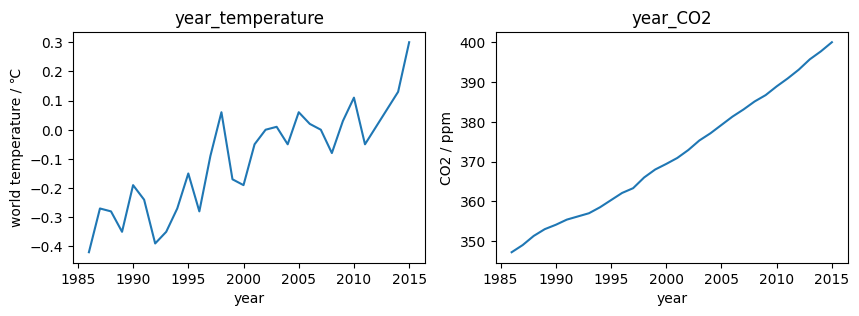

In [211]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(df["year"], df["world_temp"])
plt.xlabel("year")
plt.ylabel("world temperature / ℃")
plt.title("year_temperature")
plt.subplot(1, 2, 2)
plt.plot(df["year"], df["CO2/ppm"])
plt.xlabel("year")
plt.ylabel("CO2 / ppm")
plt.title("year_CO2")
plt.show()

In [212]:
df.to_csv("/content/drive/MyDrive/temperature_CO2/temperature_CO2_preprocessing.csv")